# Initialize code

In [8]:
import os
import math

# Numbers and dataframes
import numpy as np
import pandas as pd

# Visualization
#import dtale
#import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Initialize settings
from scrapy.utils.project import get_project_settings
settings = get_project_settings()

# # Ignore Warnings
# import warnings
# warnings.filterwarnings("ignore")

#%% Initialize settings and contstants:
np.set_printoptions(precision=2, suppress=True)
pd.set_option('display.max_columns', 20)




Read mongodb data

In [3]:
from pymongo import MongoClient
from datetime import datetime, timezone
import tzlocal

QUERY = {
    'meta.time_parsed': {
        '$gt': datetime(2021, 12, 1, 0, 0, 0)
    }
}


def read_mongo(uri = settings.get('MONGO_URI'), db_name = settings.get('MONGO_DB_NAME'), collection="", query=QUERY, no_id=False):
    """ Read from Mongo and Store into DataFrame """
    conn = MongoClient(uri)
    db = conn[db_name]
    collection = db[collection]
    cursor = collection.find(query)
    df =  pd.json_normalize(list(cursor), record_prefix="", meta_prefix="")
    if no_id:
        del df['_id']
    return df


In [4]:
df = read_mongo(collection="FinnLaptop")

print(df.shape)
print(df.dtypes)


(5450, 11)
_id                              int64
url                             object
address                         object
body                            object
brand                           object
condition                       object
last_changed            datetime64[ns]
price                          float64
title                           object
meta.time_parsed        datetime64[ns]
meta.time_git_commit    datetime64[ns]
dtype: object


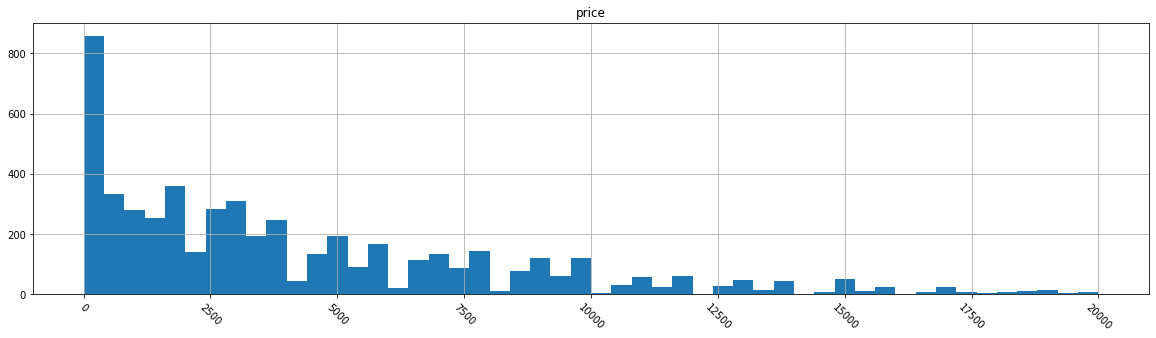

In [10]:
# Plot price
df.query("price < 20000").hist(column = ["price"], figsize=(20,5), xrot=-45, bins=50) ## Display the labels rotated by 45 degress
plt.show() # Clear the text "residue"

# Reshape and restructure

In [11]:
df['brand'].value_counts()

Apple              1930
Annet               687
Lenovo              684
HP                  542
Asus                329
Dell                304
Acer                304
Fujitsu Siemens      24
Toshiba              23
Name: brand, dtype: int64

In [12]:
df.query('brand == "Annet"')['title']

32      Uåpnet SAMSUNG GALAXY CHROMEBOOK GO 14" LAPTOP...
33                                  Pc veske (IKKE BRUKT)
38       Kraftig MSI GS65 Stealth Thin 8RF (toppmodellen)
42      Helt ny uåpent MSI GV72 8RE-019 17,3" bærbar g...
56      Rain design mStand laptopstativ for MacBook (m...
                              ...                        
5428                                              Huaweii
5429     Gaming PC fra Komplett - Komplett Gamer Mini i05
5431                              Samsung Galaxy Book Pro
5435                                     McAfee antivirus
5445    MSI 15,6" gaming bærbar - Med 2 år Trygghetsav...
Name: title, Length: 687, dtype: object

In [19]:
df[df['title'].str.contains("5800H", regex="false")]

,_id,url,address,body,brand,condition,last_changed,price,title,meta.time_parsed,meta.time_git_commit
3756,243300212,https://www.finn.no/bap/forsale/ad.html?finnko...,"Helleveien 141, 5039 Bergen",Selger en fantastisk god gaming laptop som er ...,Lenovo,Ny,2022-01-10 16:19:00,14999.0,Kraftpakke! Gaming laptop - Med 3070-grafikk o...,2022-01-13 21:50:23.054,2021-12-19 14:56:57
4551,245166136,https://www.finn.no/bap/forsale/ad.html?finnko...,"Helleveien 141, 5039 Bergen",Selger en fantastisk god gaming laptop som er ...,Lenovo,Ny,2022-01-19 15:53:00,13899.0,Kraftpakke! Gaming laptop - Med 3070-grafikk o...,2022-01-21 15:27:39.201,2021-12-19 14:56:57
